In [2]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

df_CO2 = pd.read_excel("Food Research 2022.08.28.xlsx")

In [3]:
df_CO2['Type of Food']
beef_footprint= df_CO2[df_CO2['Type of Food']=='Beef']['Updated CO2 Emission'].values[0]
chick_footprint= df_CO2[df_CO2['Type of Food']=='Poultry']['Updated CO2 Emission'].values[0]
vege_footprint= df_CO2[df_CO2['Type of Food']=='Total Vegetables']['Updated CO2 Emission'].values[0]
print (beef_footprint, chick_footprint, vege_footprint)

df_CO2['Type of Food']

99.48 9.87 0.53


0                 Beef
1                 Pork
2              Poultry
3                 Lamb
4                 Fish
5               Shrimp
6               Cheese
7                 Eggs
8                 Milk
9                Wheat
10        Total Fruits
11    Total Vegetables
12            Tomatoes
13                Peas
14            Potatoes
15              Onions
16             Berries
17             Bananas
18        Citrus Fruit
19              Apples
20              Coffee
Name: Type of Food, dtype: object

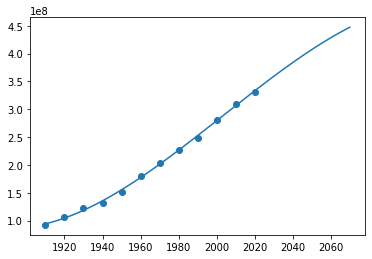

Year: 1910.0 Population: 94104186.0
Year: 1911.0 Population: 94974311.0
Year: 1912.0 Population: 95883622.0
Year: 1913.0 Population: 96831693.0
Year: 1914.0 Population: 97818100.0
Year: 1915.0 Population: 98842418.0
Year: 1916.0 Population: 99904223.0
Year: 1917.0 Population: 101003090.0
Year: 1918.0 Population: 102138595.0
Year: 1919.0 Population: 103310312.0
Year: 1920.0 Population: 104517818.0
Year: 1921.0 Population: 105760687.0
Year: 1922.0 Population: 107038495.0
Year: 1923.0 Population: 108350818.0
Year: 1924.0 Population: 109697230.0
Year: 1925.0 Population: 111077307.0
Year: 1926.0 Population: 112490624.0
Year: 1927.0 Population: 113936757.0
Year: 1928.0 Population: 115415281.0
Year: 1929.0 Population: 116925772.0
Year: 1930.0 Population: 118467804.0
Year: 1931.0 Population: 120040954.0
Year: 1932.0 Population: 121644796.0
Year: 1933.0 Population: 123278905.0
Year: 1934.0 Population: 124942858.0
Year: 1935.0 Population: 126636230.0
Year: 1936.0 Population: 128358596.0
Year: 19

In [4]:
# Trend over time (+population + time)
df_pop = pd.read_excel("Food Research 2022.08.28.xlsx", sheet_name = "4. Population")
df_popX = df_pop['Year']
df_popY = df_pop['Population']
df_popY = df_popY.dropna()
df_popX = df_popX.dropna()
df_popgraph = numpy.poly1d(numpy.polyfit(df_popX, df_popY,3))

df_popline = numpy.linspace(1910, 2070, 161)
plt.scatter(df_popX, df_popY)
plt.plot(df_popline, df_popgraph(df_popline))
plt.show()
df_show = df_popgraph(df_popline)
for i in range(0, len(df_show)):
  print("Year:", df_popline[i], "Population:", round(df_show[i]))


In [5]:
df_show2=numpy.array([round(x) for x in df_show])
#df3= pd.DataFrame(df_show2)
#filepath="population.xlsx"
#df3.to_excel(filepath,index=False)
df_show2

array([9.41041860e+07, 9.49743110e+07, 9.58836220e+07, 9.68316930e+07,
       9.78181000e+07, 9.88424180e+07, 9.99042230e+07, 1.01003090e+08,
       1.02138595e+08, 1.03310312e+08, 1.04517818e+08, 1.05760687e+08,
       1.07038495e+08, 1.08350818e+08, 1.09697230e+08, 1.11077307e+08,
       1.12490624e+08, 1.13936757e+08, 1.15415281e+08, 1.16925772e+08,
       1.18467804e+08, 1.20040954e+08, 1.21644796e+08, 1.23278905e+08,
       1.24942858e+08, 1.26636230e+08, 1.28358596e+08, 1.30109530e+08,
       1.31888610e+08, 1.33695410e+08, 1.35529505e+08, 1.37390470e+08,
       1.39277882e+08, 1.41191315e+08, 1.43130345e+08, 1.45094548e+08,
       1.47083498e+08, 1.49096770e+08, 1.51133941e+08, 1.53194586e+08,
       1.55278280e+08, 1.57384598e+08, 1.59513115e+08, 1.61663408e+08,
       1.63835051e+08, 1.66027620e+08, 1.68240690e+08, 1.70473837e+08,
       1.72726636e+08, 1.74998661e+08, 1.77289490e+08, 1.79598696e+08,
       1.81925856e+08, 1.84270544e+08, 1.86632336e+08, 1.89010808e+08,
      

In [6]:
df_consumption = pd.read_excel("Food Research 2022.08.28.xlsx", sheet_name = "3. Food Consumption")
beef_2019= df_consumption.loc[(df_consumption['Year']==2019) & (df_consumption['Tab name']=='Beef')]['Consumer Weight in kg'].values[0]
vege_2019= df_consumption.loc[(df_consumption['Year']==2018) & (df_consumption['Tab name']=='Total Vegetables')]['Consumer Weight in kg'].values[0]

# print(beef_2019, vege_2019)

# calculate how many millions of tons of CO2 can be produced by food consumption
total_emission = 0
emission_per_year=numpy.arange(1970, 2019)
df_yearline = numpy.linspace(1970, 2018, 49)
for i in range(1970, 2019):
    emission_per_year[i-1970] = 0
    for t in df_CO2['Type of Food']:
        #print(t)
        food_consumped_this_year = df_consumption.loc[(df_consumption['Year']==i) & (df_consumption['Tab name']==t)]['Consumer Weight in kg'].values[0]
        footprint= df_CO2[df_CO2['Type of Food']==t]['Updated CO2 Emission'].values[0]
        #print(i,t, food_consumped_this_year, food_consumped_this_year*footprint)
        food_emission = food_consumped_this_year*footprint*round(df_show2[i-1910])/1000000
        emission_per_year[i-1970] = emission_per_year[i-1970] + food_emission
    #print(i, df_yearline[i-1970], emission_per_year[i-1970])

print( df_yearline.shape, emission_per_year.shape )
plt.plot(df_yearline, emission_per_year)
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [7]:
sum1 = 0
sum2 = 0
sum_veg = 0
emission_new=numpy.arange(1970,2019)
emission_chicken = numpy.arange(1970,2019)
for i in range(1970, 2019):
    emission_new[i-1970] = 0
    emission_chicken[i-1970] = 0
    pop = df_show2[i-1910]
    #print (df_show2[i-1910])
    for t in df_CO2['Type of Food']:
        food_consumped_this_year = df_consumption.loc[(df_consumption['Year']==i) & (df_consumption['Tab name']==t)]['Consumer Weight in kg'].values[0]
        footprint= df_CO2[df_CO2['Type of Food']==t]['Updated CO2 Emission'].values[0]
        if t == 'Beef':
            # sum1 = sum1 + beef_2019*pop*beef_footprint
             sum2 = sum2 + 0.5*food_consumped_this_year*beef_footprint + 0.5*food_consumped_this_year*pop*chick_footprint
            # sum_veg = sum_veg + 0.5*beef_2019*pop*beef_footprint + 0.5*vege_2019*pop*vege_footprint
             food_emission = 0.5*food_consumped_this_year*footprint*round(df_show2[i-1910])/1000000
             food_emiss_chicken = 0.5*food_consumped_this_year*footprint*round(df_show2[i-1910])/1000000
        else:
             food_emission = food_consumped_this_year*footprint*round(df_show2[i-1910])/1000000
        emission_new[i-1970] = emission_new[i-1970] + food_emission

plt.plot(df_yearline, emission_new, color="blue", label='reduce beef consumption by 50%')
plt.plot(df_yearline, emission_per_year, color="green", label='actual consumption')
plt.legend()
plt.show()

#print ((sum1-sum2)/1000,(sum1-sum_veg)/1000)
#print((sum1-sum2)/sum1)
#print((sum1-sum_veg)/sum1)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [8]:
sum3 = 0
sum4 = 0
for i in range(2020, 2050):
    pop = df_show2[i-1910]
    #print (df_show2[i-1910])
    sum3 = sum3 + beef_2019*pop*beef_footprint
    sum4 = sum4 + 0.5*beef_2019*pop*beef_footprint + 0.5*beef_2019*pop*chick_footprint
print(sum3)
print(sum4)
print((sum3-sum4)/sum3)

26436443380709.027
14529679753118.885
0.4503920386007235


In [9]:
# A typical passenger vehicle emits about 4.6 metric tons of carbon dioxide per year.
print(beef_2019*beef_footprint)
print(0.5*beef_2019*beef_footprint-0.5*beef_2019*chick_footprint)
# A typical tree can absorb around 21 kilograms of carbon dioxide (CO2) per year

2382.3939515052307
1073.0112685684746


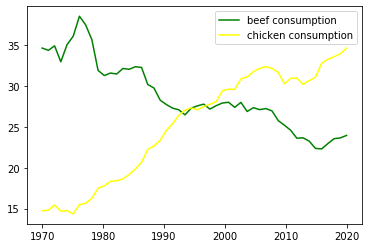

[24.06957487 24.18783445 24.30331709 24.41608799 24.52621083 24.63374779
 24.73875959 24.84130553 24.94144351 25.03923007 25.13472043 25.2279685
 25.31902695 25.40794718 25.49477941 25.57957266 25.66237482 25.74323263
 25.82219176 25.89929679 25.97459126 26.04811768 26.11991757 26.19003147
 26.25849897 26.32535874 26.39064851 26.45440517 26.51666471 26.57746229]
[34.6294798  34.34707087 34.90070692 32.94848574 35.0294369  36.07372129
 38.51526256 37.45935447 35.65131485 31.89520069 31.26481955 31.57109554
 31.45287082 32.13252392 32.0309361  32.34456174 32.25950583 30.17095331
 29.74500274 28.26009987 27.71848057 27.28276227 27.07814796 26.46225177
 27.28884036 27.56238074 27.77136231 27.16930955 27.57413353 27.90794178
 28.00210903 27.38148184 27.98585021 26.87213052 27.33741434 27.1017582
 27.23131254 26.94819346 25.76039601 25.1960159  24.58571776 23.60585022
 23.65657529 23.24334348 22.35987272 22.30173718 22.95666308 23.55086575
 23.64411053 23.94847157 24.06957487 24.18783445 24.

In [10]:
import statsmodels.api as sm

# Food Consumption Prediction
df_consumption = pd.read_excel("Food Research 2022.08.28.xlsx", sheet_name = "3. Food Consumption")
# 1970 - 2019
beefs = df_consumption.loc[df_consumption['Tab name']=='Beef']['Consumer Weight in kg']
poultries = df_consumption.loc[df_consumption['Tab name']=='Poultry']['Consumer Weight in kg']
beef_list = beefs.to_numpy()
chicken_list = poultries.to_numpy()
# plot the eating habit change from 1970 to 2020
yearline = numpy.linspace(1970, 2020,50)
plt.plot(yearline, beef_list, color="green", label='beef consumption')
plt.plot(yearline, chicken_list, color="yellow", label='chicken consumption')
plt.legend()
plt.show()

mod = sm.tsa.SARIMAX(beef_list, order=(1, 0, 0), trend='c')
# Estimate the parameters
res = mod.fit()

# forcast the beef consumption in the next 20 years
print(res.forecast(steps=30))

future = res.forecast(steps=30)
beef_long_list = numpy.concatenate((beef_list, future), axis=None)
print(beef_long_list)

In [11]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
# contrived dataset
def forcast_30_years(data):
    # fit model for beef
    model = AutoReg(data, lags=1)
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.predict(len(data), len(data))
    yhat_list = model_fit.forecast(steps=30)
    print(yhat_list)
    long_list = numpy.concatenate((data, yhat_list), axis=None)
    return long_list

# fit mode 
x = numpy.linspace(1970, 2050,80)
beef_long_list = forcast_30_years(beef_list)
chicken_long_list = forcast_30_years(chicken_list)

# construct a beef_long_list where the beef consumption is reduced by 50%
new_beef_list = numpy.zeros(80)
for i in range(0,80):
    if i < 50:
        new_beef_list[i]=beef_long_list[i]
    else:
        new_beef_list[i]=beef_long_list[50]*pow(0.98,i-50)
plt.plot(x, beef_long_list, color="green",label='beef consumption')
plt.plot(x, chicken_long_list, color="yellow", label='chick consumption')
plt.plot(x, new_beef_list, color="blue", label='reduced beef consumption')
print(new_beef_list)

plt.legend()
plt.xlabel('year')
plt.ylabel('consumption in pounds')
plt.show()


AttributeError: 'AutoRegResults' object has no attribute 'forecast'

In [12]:
# calculate reduced carbone emission
# diet change: beef_long_list, new_beef_list chicken_long_list
# population change: df_show
df_show2=numpy.array([round(x) for x in df_show])
# carbon emission 
old_sum = 0
new_sum = 0
chick_2020 = chicken_long_list[2020-1970]
for i in range(2020, 2050):
     pop = df_show2[i-1910]
     beef_consumed = beef_long_list[i-1970]
     reduce_beef = new_beef_list[i-1970]
     chick_consumed = chicken_long_list[i-1970]
     old_sum = old_sum + beef_footprint*beef_consumed*pop + chick_footprint*chick_2020*pop
     new_sum = new_sum + beef_footprint*reduce_beef*pop + chick_footprint*chick_consumed*pop

print('estimated CO2 emission caused by beef consumption over the next 30 years %d million tons' % (old_sum/1000000000))
print('estimated CO2 emission that we can be acheive by gradually replacing beef with chicken in the next 30 years %d million tons' % (new_sum/1000000000))
print((old_sum - new_sum)/1000000000)

# in one year a mature tree will absorb more than 48 pounds of carbon dioxide from the atmosphere and release oxygen in exchange
# A tree absorbs approximately 25kg of CO2 per year
t=(old_sum - new_sum)/pop
print('this amount of CO2 emission reduction would be quivalent to planting %d trees ' % (t/(25*30) ))

NameError: name 'chicken_long_list' is not defined

In [13]:
import statsmodels
from statsmodels.tsa.ar_model import AutoReg
from random import random
import statsmodels.api as sm

# contrived dataset
def forcast_30_years(data):
    # fit model for beef
    model = AutoReg(data, lags=1)
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.predict(len(data), len(data))
    yhat_list = model_fit.forecast(steps=30)
    print(yhat_list)
    long_list = numpy.concatenate((data, yhat_list), axis=None)
    return long_list

# read beef and chicken consumption in pounds

df_consumption = pd.read_excel("Food Research 2022.08.28.xlsx", sheet_name = "3. Food Consumption")
# 1970 - 2019
beefs = df_consumption.loc[df_consumption['Tab name']=='Beef']['Consumer Weight in Pounds']
poultries = df_consumption.loc[df_consumption['Tab name']=='Poultry']['Consumer Weight in Pounds']
beef_list = beefs.to_numpy()
chicken_list = poultries.to_numpy()
# fit mode 
x = numpy.linspace(1970, 2050,80)
beef_long_list = forcast_30_years(beef_list)
chicken_long_list = forcast_30_years(chicken_list)

# construct a beef_long_list where the beef consumption is reduced by 50%
new_beef_list = numpy.zeros(80)
for i in range(0,80):
    if i < 50:
        new_beef_list[i]=beef_long_list[i]
    else:
        new_beef_list[i]=beef_long_list[50]*pow(0.98,i-50)
plt.plot(x, beef_long_list, color="green",label='beef consumption')
plt.plot(x, chicken_long_list, color="yellow", label='chick consumption')
plt.plot(x, new_beef_list, color="blue", label='reduced beef consumption')
print(new_beef_list)

plt.legend()
plt.xlabel('year')
plt.ylabel('consumption in pounds')
plt.show()

AttributeError: 'AutoRegResults' object has no attribute 'forecast'

In [14]:

# carbon emission 
old_sum = 0
new_sum = 0
chick_2020 = chicken_long_list[2020-1970]
emission_list = numpy.arange(1970,2050)
new_emission_list = numpy.arange(1970,2050)
beef_emission_list = numpy.arange(1970,2050)
chick_emission_list = numpy.arange(1970,2050)
poundtokg = 0.4536
for i in range(1970, 2050):
     beef_consumed = beef_long_list[i-1970]
     reduce_beef = new_beef_list[i-1970]
     chick_consumed = chicken_long_list[i-1970]
     emission_list[i-1970] =  (beef_footprint*beef_consumed + chick_footprint*chick_consumed)*poundtokg;
     new_emission_list[i-1970] = (beef_footprint*reduce_beef + chick_footprint*chick_consumed)*poundtokg;
     beef_emission_list[i-1970] = beef_footprint*beef_consumed*poundtokg;
     chick_emission_list[i-1970] = chick_footprint*chick_consumed*poundtokg
    

plt.plot(x, emission_list, color="green",label='projected emission per consumer')
plt.plot(x, new_emission_list, color="yellow", label='reduced emission per consumer')
plt.plot(x, beef_emission_list, color="blue", label='projected  emission by beef per consumer')
plt.plot(x, chick_emission_list, color="black", label='projected  emission by chick per consumer')

print(chicken_long_list)
print(emission_list)
print(new_emission_list)

plt.legend()
plt.xlabel('year')
plt.ylabel('emission per consumer')
plt.show()

NameError: name 'chicken_long_list' is not defined